In [1]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anthonypino/melbourne-housing-market")

print("Path to dataset files:", f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")
df = pd.read_csv(f"{path}/MELBOURNE_HOUSE_PRICES_LESS.csv")

Path to dataset files: /Users/nikitabykov/.cache/kagglehub/datasets/anthonypino/melbourne-housing-market/versions/27/MELBOURNE_HOUSE_PRICES_LESS.csv


In [2]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [4]:
len(df["SellerG"].unique())

476

In [5]:
len(df["Date"].unique())

112

In [6]:
len(df["CouncilArea"].unique())

34

In [7]:
len(df["SellerG"].unique())

476

In [8]:
# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available. 


In [9]:
# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

# Convert date to total seconds since Unix epoch
df['Date'] = (df['Date'] - pd.Timestamp('1970-01-01')).dt.total_seconds()

In [11]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [12]:
df.count()

Suburb           63023
Address          63023
Rooms            63023
Type             63023
Price            48433
Method           63023
SellerG          63023
Date             63023
Postcode         63023
Regionname       63023
Propertycount    63023
Distance         63023
CouncilArea      63023
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.count()

Suburb           48433
Address          48433
Rooms            48433
Type             48433
Price            48433
Method           48433
SellerG          48433
Date             48433
Postcode         48433
Regionname       48433
Propertycount    48433
Distance         48433
CouncilArea      48433
dtype: int64

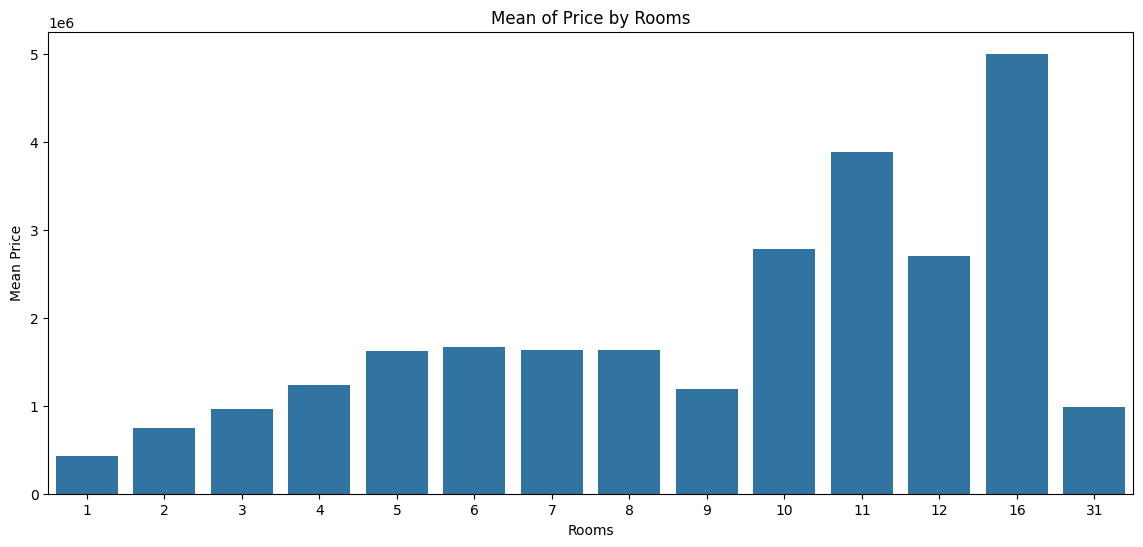

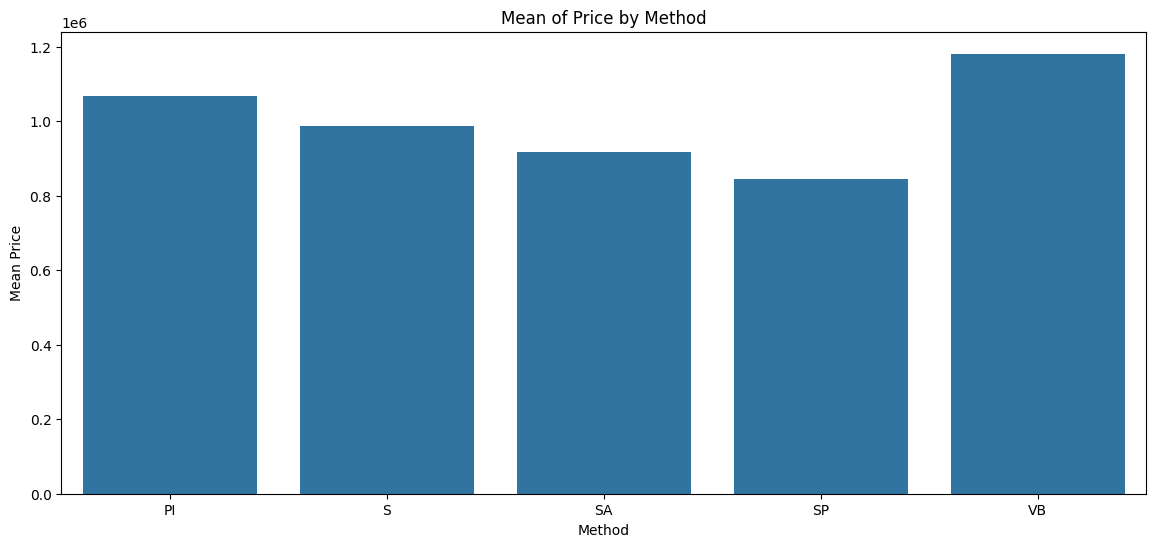

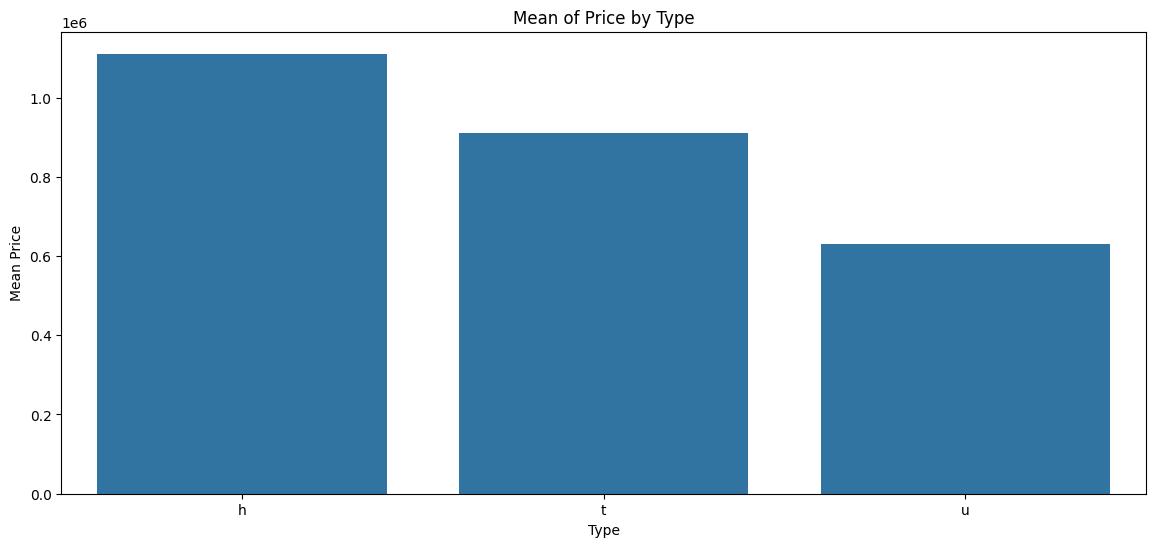

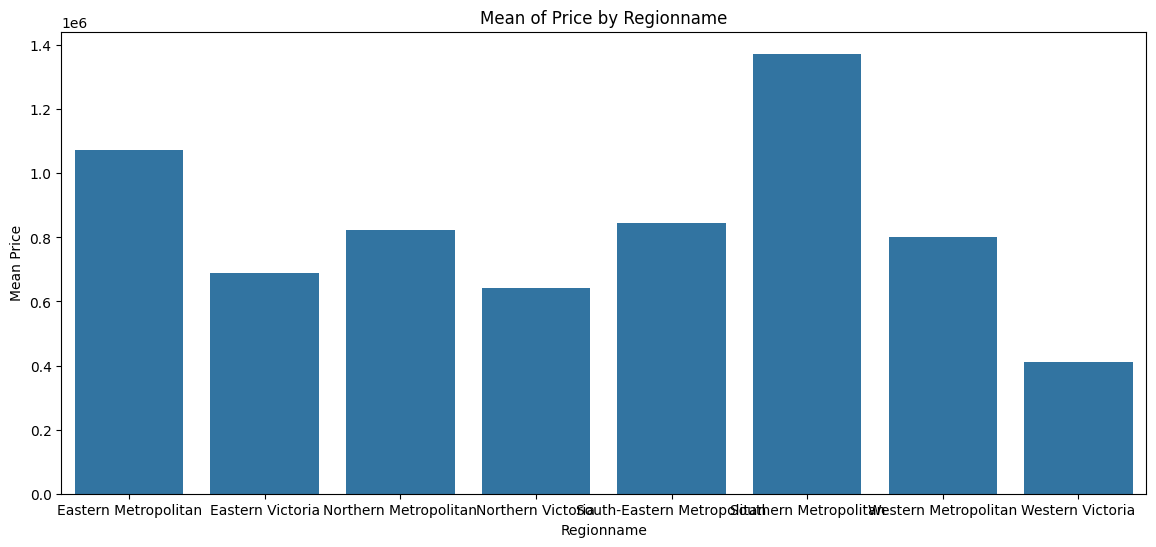

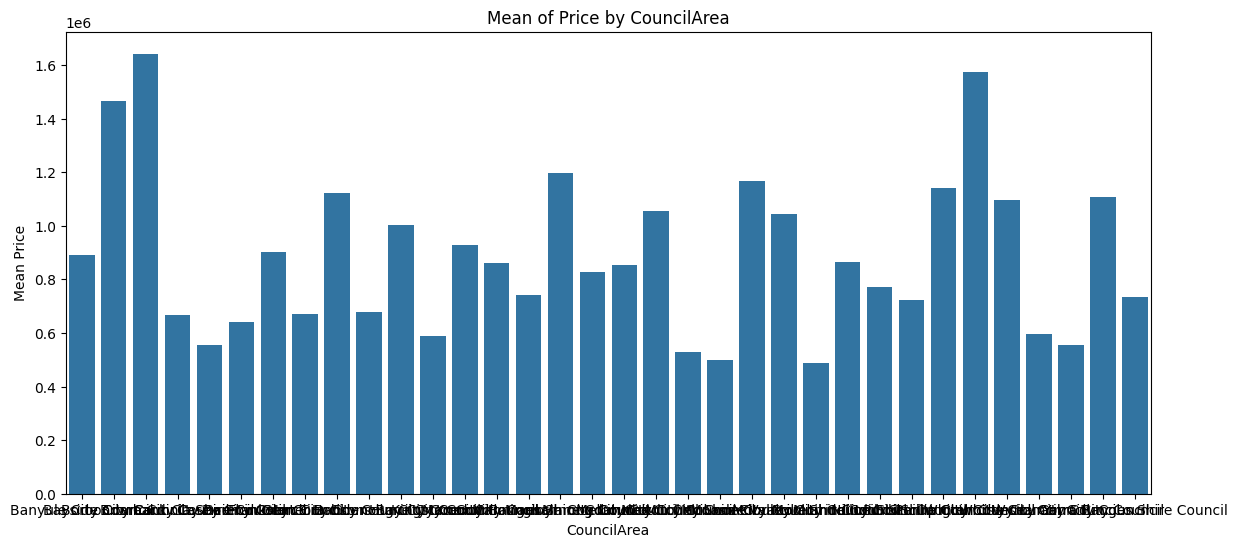

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_24952/1533090021.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


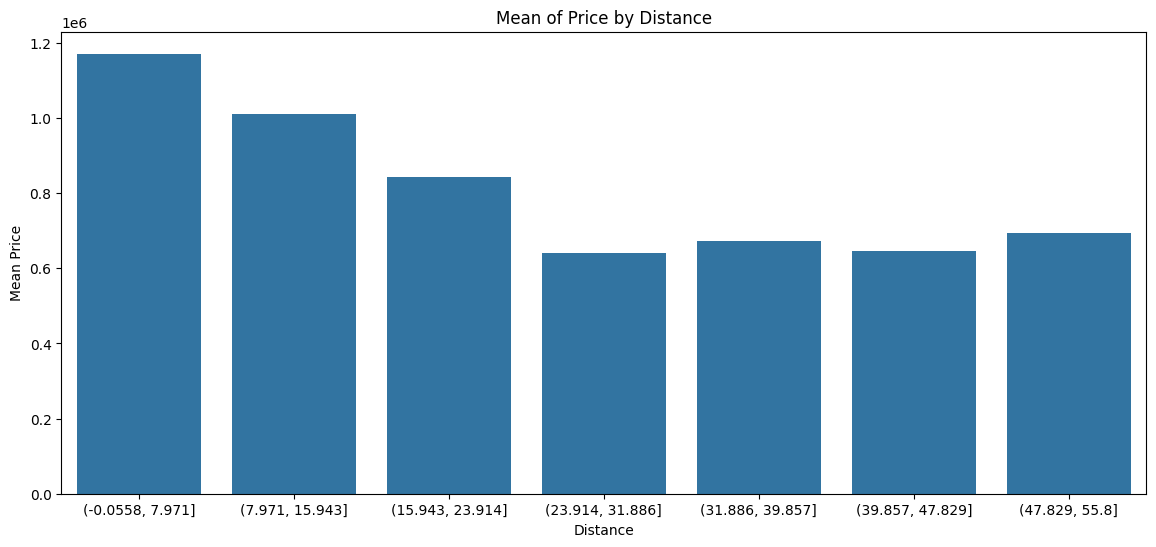

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_24952/1533090021.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


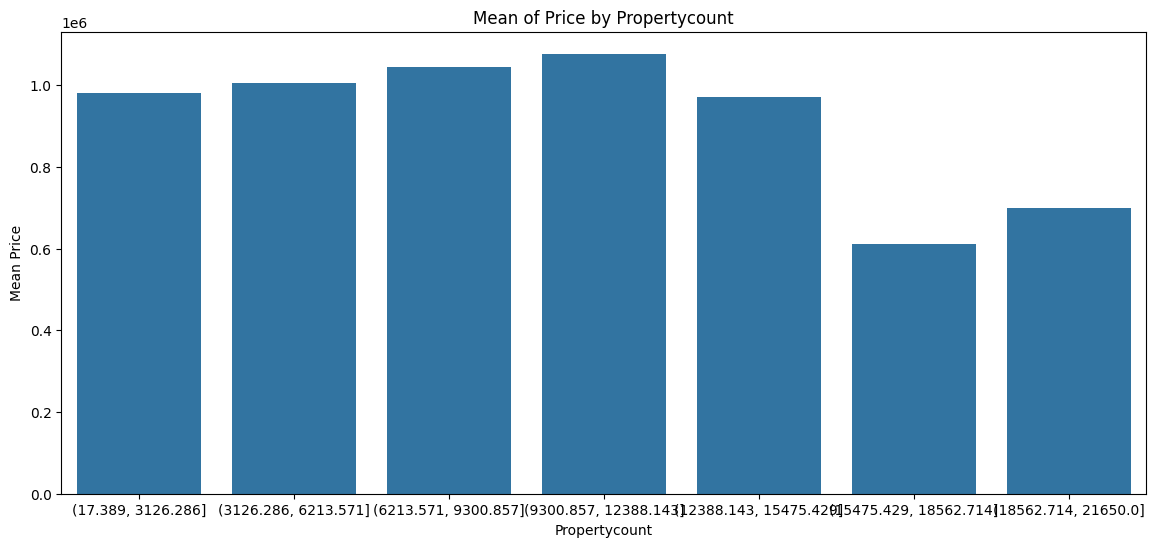

/var/folders/g9/5388270d4mqdbb4p3b8ry8880000gn/T/ipykernel_24952/1533090021.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()


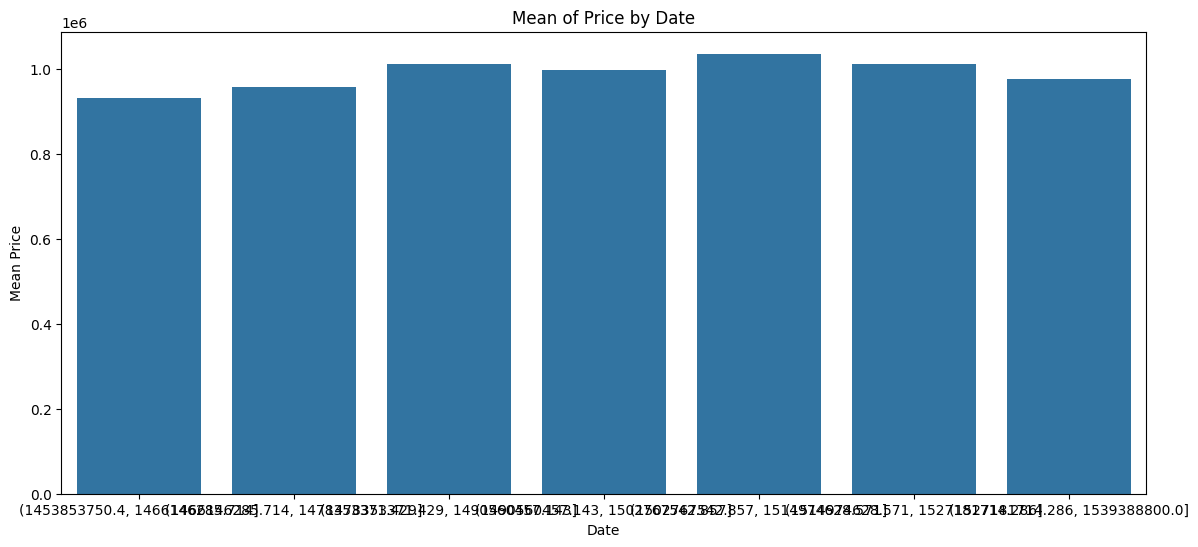

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

df_target = df["Price"]
df_target_name = "Price"

discrete_data_columns = ["Rooms"]
continuous_data_columns = ["Distance", "Propertycount", "Date"]
number_data_columns = discrete_data_columns + continuous_data_columns
categorical_data_columns = ["Regionname", "Method", "Type", "CouncilArea"]

plt.rcParams['figure.figsize'] = (14, 6)

for column in discrete_data_columns + ["Method", "Type", "Regionname", "CouncilArea"]:
    # Calculate the mean of 'target' by 'group'
    mean_target_by_group = df.groupby(column)[df_target_name].mean()
    
    mean_target_by_group = mean_target_by_group.reset_index()

    # Plot
    sns.barplot(data=mean_target_by_group, x=column, y=df_target_name)
    plt.title(f'Mean of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.show()


for column in continuous_data_columns:
    # Calculate the mean of 'target' by 'group'# Bin 'x' into discrete categories
    df_grouped_cont = df.copy()
    df_grouped_cont['x_bin'] = pd.cut(df_grouped_cont[column], bins=7)
    
    # Calculate mean of 'y' for each bin
    aggregated_data = df_grouped_cont.groupby('x_bin')[df_target_name].mean().reset_index()

    # Plot
    sns.barplot(data=aggregated_data, x='x_bin', y=df_target_name)
    plt.title(f'Mean of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Price')
    plt.show()
    

# sns.countplot(data=df, x='Rooms', y=df_target_name, kde=True)
# plt.title('Scatter Plot of Feature1 vs Target')
# plt.show()

# for i in range(len(df.columns)-1):
#     sns.histplot(data=df, bins=15, stat=count x=df.columns[i],hue="Price",ax=axs[i])

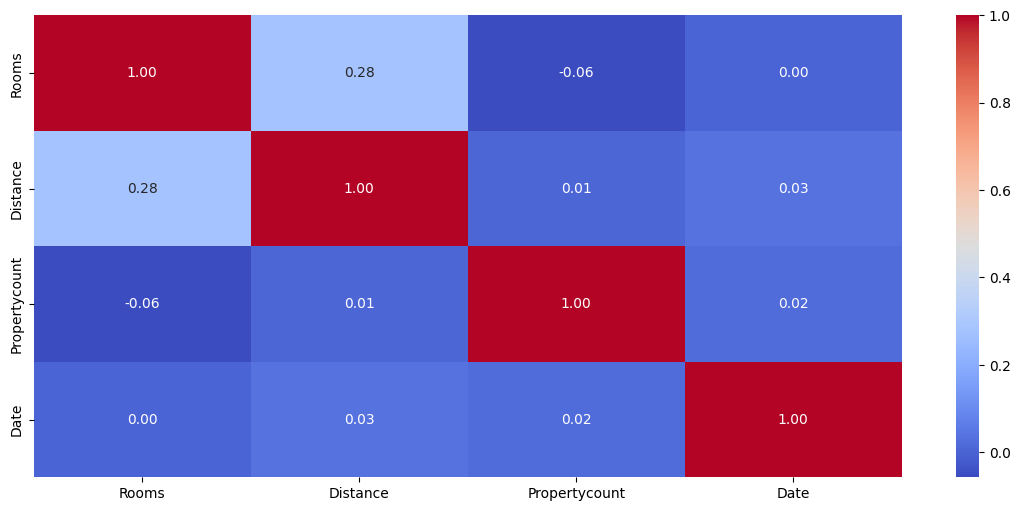

In [16]:
sns.heatmap(df[number_data_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [17]:
drop_columns = ["SellerG", "Address", "Suburb"]

for col in drop_columns:
    df = df.drop(col, axis=1)

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df_encoded = pd.get_dummies(df, columns=categorical_data_columns)
print(df_encoded.columns)

target_col = df_encoded[df_target_name]
df_encoded = df_encoded.drop(df_target_name, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target_col, test_size = 0.25, random_state = 1)

Index(['Rooms', 'Price', 'Date', 'Postcode', 'Propertycount', 'Distance',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Type_h', 'Type_t', 'Type_u',
       'CouncilArea_Banyule City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Hobsons Bay City Council', 'CouncilArea_Hume City Council',

In [19]:
print(df_encoded.columns)

Index(['Rooms', 'Date', 'Postcode', 'Propertycount', 'Distance',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Method_PI', 'Method_S', 'Method_SA',
       'Method_SP', 'Method_VB', 'Type_h', 'Type_t', 'Type_u',
       'CouncilArea_Banyule City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Hobsons Bay City Council', 'CouncilArea_Hume City Council',
       '

In [20]:
def get_top_features(coef, top_n=5):
    print("best feature")
    coef_df = pd.DataFrame({
        'Feature': df_encoded.columns,
        'Coefficient': coef
    })
    coef_df['Importance'] = np.abs(coef_df['Coefficient'])

    return coef_df.nlargest(top_n, 'Importance')

def print_metrics(model):
    y_pred_train = model.predict(X_train)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    print(f"RMSE_train: {rmse:.2f}")
    
    y_pred_test = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"RMSE_test: {rmse:.2f}")
    
    r2 = r2_score(y_test, y_pred_test)
    print(f"R^2: {r2:.2f}")

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dtr = DecisionTreeRegressor(max_depth=5, random_state=10)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

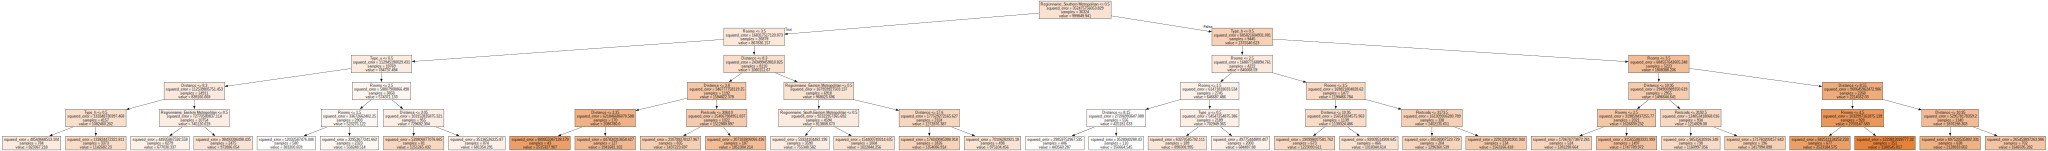

In [22]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None,
                                feature_names=df_encoded.columns,
                                filled=True)
graphviz.Source(dot_data, format="png")

<Figure size 2500x2000 with 0 Axes>

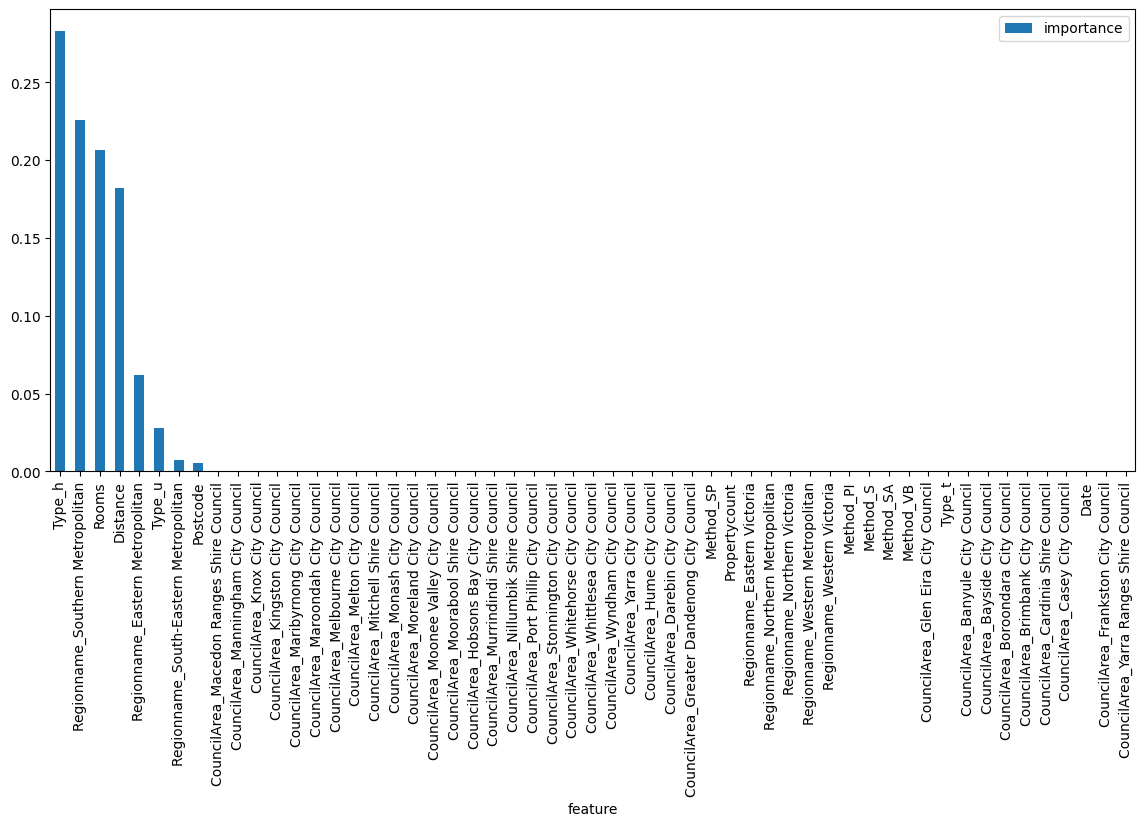

In [23]:
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':df_encoded.columns, 'importance': dtr.feature_importances_})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [24]:
print_metrics(dtr)

RMSE_train: 364834.75
RMSE_test: 373908.70
R^2: 0.60


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('coeffitients:')
print(lin_reg.coef_)
print()

print('intercept:')
print(lin_reg.intercept_)

coeffitients:
[ 2.29249308e+05  4.09255005e+04  2.34367215e+04 -3.98212725e+03
 -2.55046194e+05 -7.87348355e+17 -1.91718475e+17 -9.73583894e+17
 -2.13392409e+17 -5.98897194e+17 -9.51498576e+17 -8.67274986e+17
 -1.31016719e+17  4.43466784e+17  6.53505311e+17  1.17232563e+17
  4.62620119e+17  4.13473467e+17 -8.71715251e+17 -5.79773811e+17
 -7.52960124e+17  9.85137611e+17  9.22540747e+17  1.08468393e+18
  9.63813499e+17  1.38427609e+17  3.54527531e+17  1.06750087e+18
  4.81967188e+17  8.99090887e+17  4.60147390e+17  6.29142728e+17
  9.00293315e+17  8.38626681e+17  5.09226663e+17  2.08645001e+17
  7.73610487e+17  7.73610487e+17  6.00443573e+17  8.30462637e+17
  4.40387244e+17  1.00326589e+17  9.08893119e+17  8.51598200e+17
  6.19340013e+16  9.34337283e+17  2.18990864e+16  2.94697822e+17
  6.71533296e+17  6.57162477e+17  6.86888991e+17  8.40979217e+17
  6.38871852e+17  6.83583616e+17  2.50197566e+17]

intercept:
999864.1883831578


In [27]:
print_metrics(lin_reg)

RMSE_train: 380650.52
RMSE_test: 111032801862376544.00
R^2: -35077157158286671216640.00


In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

print('coeffitients:')
print(ridge.coef_)
print()

print('intercept член:')
print(ridge.intercept_)
print()

get_top_features(ridge.coef_)

coeffitients:
[ 2.28130807e+05  4.07138083e+04  2.40308741e+04 -3.13363155e+03
 -2.46956226e+05  5.33376728e+04  3.12157830e+03 -4.29185207e+04
  1.21207027e+04  2.38627873e+03  7.13368832e+03 -1.48439414e+04
  9.62831749e+03 -1.04032743e+04  9.03442034e+03 -2.74305846e+03
 -3.01529922e+03  1.03024452e+03  9.26085220e+04 -1.08226559e+04
 -9.88811574e+04 -4.96405772e+04  1.06440085e+05  1.23461818e+05
 -8.72165155e+04  5.27762020e+03 -4.51983804e+03 -1.46123506e+04
  3.60561666e+04  3.11010055e+04 -5.57502787e+03 -1.68840954e+04
 -6.11925574e+04  3.98878819e+04 -2.56458374e+04  2.12817606e+04
 -1.14758464e+04 -4.57135638e+04 -1.78171431e+04  2.46879424e+04
 -3.93643233e+04  5.51860938e+02  9.22996921e+03 -9.79788946e+03
  1.96870876e+02 -2.06698869e+04  2.18162316e+03 -2.39769203e+04
  3.29938731e+04  8.10675337e+04 -1.40115068e+04 -5.24067636e+04
 -6.38159626e+04  1.87055239e+04 -1.32041753e+03]

intercept член:
999849.9410307235

best feature


,Feature,Coefficient,Importance
4,Distance,-246956.225859,246956.225859
0,Rooms,228130.807331,228130.807331
23,CouncilArea_Boroondara City Council,123461.818386,123461.818386
22,CouncilArea_Bayside City Council,106440.085238,106440.085238
20,Type_u,-98881.157373,98881.157373


In [29]:
print_metrics(ridge)

RMSE_train: 380626.10
RMSE_test: 387294.53
R^2: 0.57


In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

print('coeffitients:')
print(lasso.coef_)
print()

print('intercept:')
print(lasso.intercept_)
print()

get_top_features(lasso.coef_)

coeffitients:
[ 228915.21868258   40768.51189346   24830.7904682    -2671.4652976
 -251889.14364897   49366.26375501    2515.14660743  -47054.68828434
   12204.90828533      -0.               0.          -14807.42193662
    9894.46212164  -11270.2628092     7757.75406296   -2843.50641083
   -3819.69984085       0.          108835.71328404      -0.
  -84837.78789591  -35245.44852596  121583.54167288  140184.25776032
  -75445.57905285    7600.0666436     1082.5445609       -0.
   44564.92215329   45255.25854022    1557.6352619    -9511.04847793
  -47857.93536495   53037.22003242  -17574.56079021   24727.11632939
       0.          -36975.91762355   -8128.14336577   36006.95162764
  -33482.10523946    2046.38182593   22961.94495997      -0.
    1020.9265933    -7877.79320325    2442.35118847  -19977.62018721
   42959.7780936    91069.83469984   -3593.97772614  -39786.35277888
  -55695.14715747   27480.9192958     2563.43625364]

intercept:
999849.9410307235

best feature


,Feature,Coefficient,Importance
4,Distance,-251889.143649,251889.143649
0,Rooms,228915.218683,228915.218683
23,CouncilArea_Boroondara City Council,140184.257760,140184.257760
22,CouncilArea_Bayside City Council,121583.541673,121583.541673
18,Type_h,108835.713284,108835.713284


In [31]:
print_metrics(lasso)

RMSE_train: 380616.10
RMSE_test: 387301.52
R^2: 0.57


In [32]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(random_state=1, alpha=0.1)
elastic.fit(X_train, y_train)

print('coeffitients:')
print(elastic.coef_)
print()

print('intercept:')
print(elastic.intercept_)
print()

get_top_features(elastic.coef_)

coeffitients:
[ 2.14188078e+05  3.77951197e+04  1.49530994e+04 -5.98252162e+03
 -1.88020814e+05  4.67057249e+04  1.56939632e+03 -4.43097773e+04
 -2.37178681e+03  4.19480015e+03  4.76242396e+04 -4.73888414e+04
 -1.19822866e+03 -8.96560133e+03  7.47066982e+03 -3.15099055e+03
 -4.33296169e+03  3.54966814e+03  9.14867186e+04 -1.09896635e+04
 -9.74530268e+04 -4.43787855e+04  8.10700170e+04  1.06384201e+05
 -6.67467926e+04  1.68784354e+01 -1.22831233e+04 -5.68387446e+03
  1.49924299e+04  1.37843558e+04 -1.38109172e+04 -3.22829595e+02
 -6.35114245e+04  2.38577206e+04 -2.83228140e+04  1.63783757e+04
 -8.18524936e+03 -2.19773318e+04 -2.27005883e+04  2.88549424e+04
 -3.25824823e+04 -4.22392718e+02  3.08199094e+03  1.28810208e+04
  1.36591441e+02 -1.17100016e+04  1.80864947e+03 -1.74926954e+04
  2.57296736e+04  7.09987509e+04 -1.21309355e+04 -5.54720222e+04
 -5.37445872e+04  2.91485876e+04 -5.86058789e+03]

intercept:
999849.9410307235

best feature


,Feature,Coefficient,Importance
0,Rooms,214188.077779,214188.077779
4,Distance,-188020.814101,188020.814101
23,CouncilArea_Boroondara City Council,106384.200784,106384.200784
20,Type_u,-97453.026756,97453.026756
18,Type_h,91486.718645,91486.718645


In [33]:
print_metrics(elastic)

RMSE_train: 381970.53
RMSE_test: 388441.18
R^2: 0.57


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[3, 7, 15],
                  min_samples_leaf=[2,5,20])

rf = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2)

grid = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=25; total time=   0.2s
[CV] END ...max_depth=3, min_samples_leaf=2, n

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=2, random_state=0),
             param_grid={'max_depth': [3, 7, 15],
                         'min_samples_leaf': [2, 5, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [35]:
rf_best = grid.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, n_jobs=2,
                      random_state=0)

<Figure size 2500x2000 with 0 Axes>

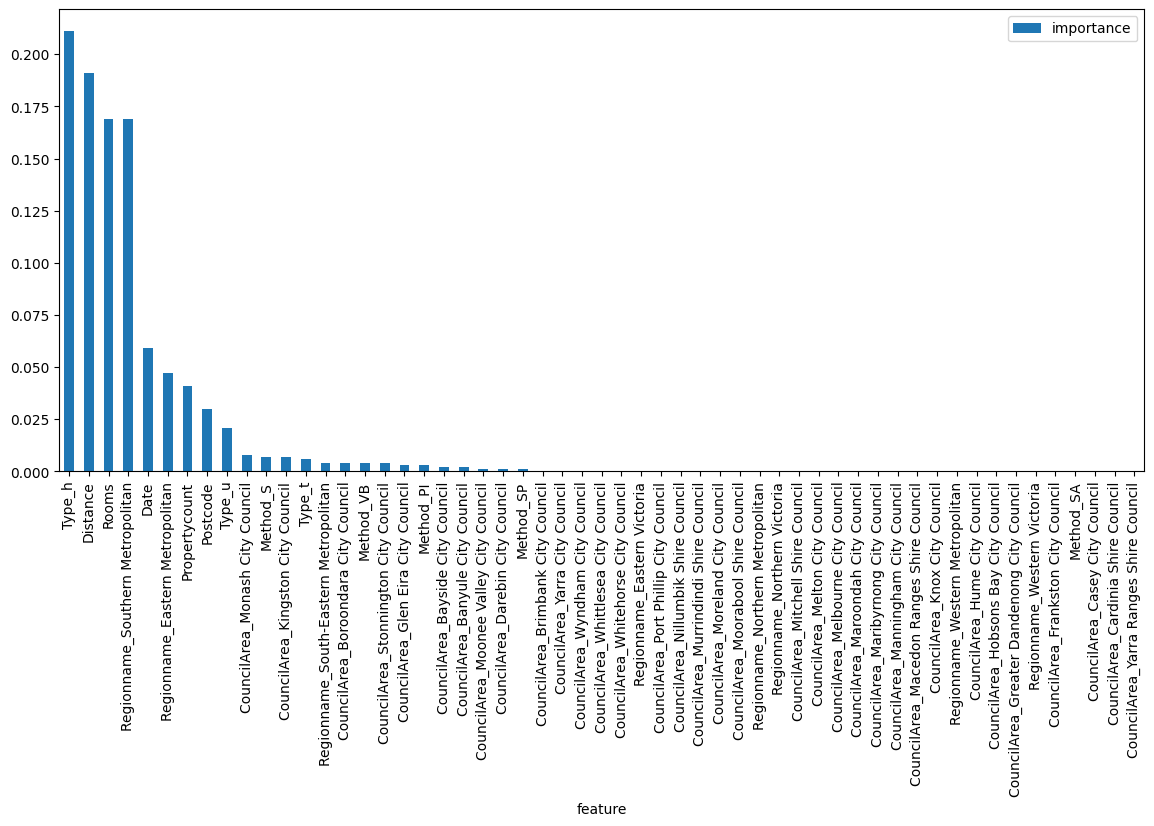

In [36]:
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':df_encoded.columns, 'importance': np.round(rf_best.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [37]:
print_metrics(rf_best)

RMSE_train: 251292.89
RMSE_test: 318983.30
R^2: 0.71
